In [95]:
import socket
socket.gethostname()

'Rajaths-Air.lan'

In [81]:
#importing libraries
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [82]:
#importing dataset
from sklearn.datasets import load_iris
iris = load_iris()
print(dir(iris))
print(iris.feature_names)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [83]:
# adding it to pandas dataframe
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [84]:
df.drop(['sepal length (cm)', 'sepal width (cm)'],axis='columns',inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


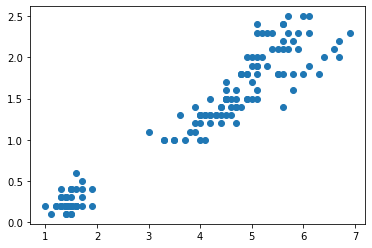

In [85]:
plt.scatter(df[['petal length (cm)']],df[['petal width (cm)']])

In [86]:
km = KMeans(n_clusters=3)

In [87]:
cluster = km.fit_predict(df[['petal length (cm)']],df[['petal width (cm)']])
df['cluster'] = cluster
print('Unique number of clusters :',df.cluster.unique())
df.head()

Unique number of clusters : [1 2 0]


,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [88]:
km.cluster_centers_  

array([[5.55686275],
       [1.462     ],
       [4.22857143]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


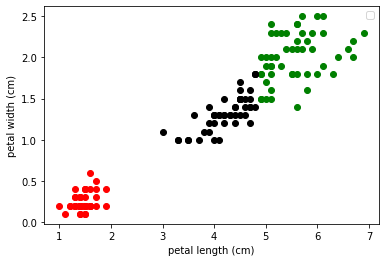

In [89]:
#plotting
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='black')
# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

#### Plotting elbow

In [90]:
k_range = range(1,10)
sse =[]
for k in k_range:
    km = KMeans(n_clusters=k)
    a=km.fit_predict(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)
sse

[550.8953333333333,
 86.39021984551397,
 31.371358974358973,
 19.483000899685113,
 13.91690875790876,
 11.10144522417154,
 9.206861111111111,
 7.697587301587301,
 6.646704739704739]

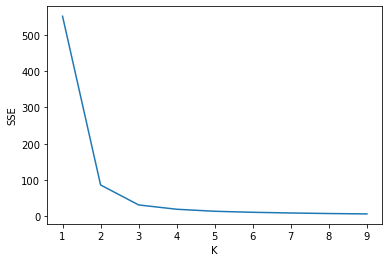

In [91]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range,sse)